In [1]:
import numpy as np 
import pandas as pd

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

import torch.nn as nn
#from tensorflow.keras import activations, optimizers, losses


C:\Users\kosty\anaconda3\envs\nn_diploma\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#!pip install transformers

In [3]:
if torch.cuda.is_available():
    # Get GPU device name
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU: {gpu_name}")
else:
    print(":( no gpu for u)")

GPU: NVIDIA GeForce RTX 4070


In [4]:
tokenizer = AutoTokenizer.from_pretrained("/kaggle/working/finetuned_model/model_bart")
model = AutoModelForSeq2SeqLM.from_pretrained("/kaggle/working/finetuned_model/model_bart")
# tokenizer = AutoTokenizer.from_pretrained("google/mt5-small")
# model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-small")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): La

In [5]:
id_checkers=['()','[','&', '$', '{', '}', '\\', '^']
for item in id_checkers:
    print(tokenizer.vocab[item])

43048
10975
947
1629
45152
24303
37457
35227


In [6]:
# # ОКАЗЫВАЕТСЯ есть проблемы со скобками. и возможно чем-то ещё. пока вот так
# new_words = ['{', '}','^','\\']
# # понять что тут произошло
# # BPE-токенизация (?)
# tokenizer.add_tokens(new_words)

# model.resize_token_embeddings(len(tokenizer))

In [7]:
for item in id_checkers:
    print(tokenizer.vocab[item])
# for item in new_words:
#     print(tokenizer.vocab[item])

43048
10975
947
1629
45152
24303
37457
35227


In [8]:
df_l = pd.read_parquet('LARGE_DF_WITH_MEDATADA_for_finetuning_from_3-8.parquet',engine='pyarrow').sample(frac=1)

In [9]:
len(df_l)

1149993

In [10]:
df= df_l.head(100000)

In [11]:
df.sample(10)

,text_id,output_texts,input_texts,tags,augmentation,formulae_only
19244,977321,Если число $N$ (по основанию 10) представляет ...,Если число $N$ (по основанию 10) представляет ...,"[numerical-methods, logarithms]",rand_delet_and_typo,False
288752,24486,$$y_3 = y_1 + \frac{d}{D}(y_2-y_1).$$,$$ игрек с индексом 3 равно игрек _1 плюс...,[geometry],synonyms,True
1030852,827987,Используя алгоритм Евклида вычисления $\gcd$.\...,Используя алгоритм Евклида вычисления $\gcd$.\...,[abstract-algebra],synonyms,False
558908,1591,"$r(t_0)\in V(y,x)$",$ ар ( т с индексом 0 скобки закрываются \in ...,"[general-topology, metric-spaces, riemannian-g...",synonyms,True
954263,400126,"вам нужно только доказать, что $n^4-3n^6+7<0$ ...","вам нужно только доказать, что $n в степени 4 ...","[calculus, sequences-and-series, limits]",all_augments,False
1030266,471363,**Теорема**\r\n$$\r\n\begin{align}\r\nRe(AB) &...,**Теорема**\r\n$$\r\n\begin{align}\r\nRe(AB) &...,"[complex-analysis, complex-numbers]",synonyms,False
234083,155433,"$$(\forall\varepsilon > 0)\,(\exists \delta >0...","$$( forall varepsilon > 0) ,( exists delta >0...",[general-topology],rand_delet_and_typo,True
718516,670948,\begin{equation*}I=\iint_{R}(1-\frac{x^{2}}{a^...,\begin{equation*}I=\iint_{R}(1-\\fracc{x^{2}}{...,"[calculus, integration, multivariable-calculus]",rand_delet_and_typo,False
334591,105485,$$\r\nI_n\sim\frac{\color{blue}{2}}{n}\frac{1}...,$$\r\nI_n\sim\frac{\color{blue}{два}}{n}\frac{...,"[integration, limits, physics, mathematical-ph...",num2word,True
1077389,795847,"С того места, где вы остановились, возведение ...","С того места, где вы остановились, возведение ...",[algebra-precalculus],synonyms,False


In [12]:
def remove_row(row):
    if row['augmentation'] in ['rand_delet_and_typo', 'all_augments']:
        row['input_texts'] = row['input_texts'].replace('$', '')
    return row

# Примените функцию к каждой строке DataFrame
df = df.apply(remove_row, axis=1)

In [13]:
df

,text_id,output_texts,input_texts,tags,augmentation,formulae_only
736251,113506,$\cot(a-b)=\frac{1+\cot(a)\cot(b)}{\cot(a)-\co...,$\cot( а - би скобки закрываются равно 1 при...,[trigonometry],synonyms,True
804960,812230,"Доказать, что $n= a×b + b×c + c×a$ нормален к ...","Доказать, что $ эн равняется a× би плюс b...",[linear-algebra],synonyms,False
843621,388848,Продолжим ваше доказательство. Пусть $x_0$ как...,Продолжим ваше доказательство. Пусть хэ с ин...,"[real-analysis, general-topology, metric-space...",all_augments,False
965974,166180,$P(1+np) = p$,$P(один+np) = p$,"[polynomials, prime-numbers]",num2word,True
684448,144485,$$\mathcal{L}_{s}^{-1}\left[k\left(\frac{1}{s+...,\mathcall{L} {s}^{-1}\left[k\left(\frac{1}{s+\...,"[integration, laplace-transform, signal-proces...",rand_delet_and_typo,True
...,...,...,...,...,...,...
850383,407708,Ваша левая сторона\r\n\r\n$$-\int \frac{v}{v^2...,Ваша левая сторона\r\n\r\n$$-\int \frac{v}{v^д...,"[calculus, integration, differential-equations]",num2word,False
471197,334675,Разрешенные расчеты:\r\n\r\n- рациональные выр...,Разрешенные расчеты:\r\n\r\n- рациональные выр...,"[abstract-algebra, galois-theory]",rand_delet_and_typo,False
84017,479114,"Как $(28,98)=14$\r\n\r\n\r\n$$x\equiv14\pmod{9...","Как $(двадцать восемь,девяносто восьмой)=четыр...","[systems-of-equations, congruences]",num2word,False
714608,27078,\begin{align}\r\n\E(e^{tX}) & = \E(\E(e^{tX}\m...,\begin{align}\r\n\E(e^{tX}) & = \E(\E(e^{ tX}\...,"[statistics, probability-distributions, moment...",rand_delet_and_typo,True


In [14]:
df.to_parquet(f"3-8_for_bart.parquet")

In [15]:
# понять какой maxlen ставить
med_1=df[df['formulae_only']].input_texts.str.len().median()
med_1

63.0

In [16]:
med_2=df[~df['formulae_only']].output_texts.str.len().median()
med_2

570.0

In [17]:
med_len=(med_1+med_2//2)//2

In [18]:
med_len

174.0

In [19]:
# maxlen посмотреть по медиане (или около того) длины
# maxlen поменьше, батчсайз побольше
# 
# rapid fuzz? (lib) -- normalized edit distance 
# ф -- f?
# \phi, \varphi --> ф
# эй би си 
# а бэ цэ
# p --> п пэ
# \pi --> пи п
# ^ \sum_{}в степени{} --> ^ 
# python
# pip install rapidfuzz -- для нормализованного расстояния левенштейна, брать отсюда


# удалил .to(device) -- ДА
class CustomDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=int(med_len)):
        df.reset_index(drop=True, inplace=True)
        self.outputs = df["output_texts"]
        self.inputs = df["input_texts"]
        self.tokenizer = tokenizer
        self.max_len=max_len

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, index):
        # для t5-small
        item = {}
        #print(index)
        
        inputs = self.tokenizer(self.inputs[index],return_tensors='pt',
                                padding='max_length',truncation=True,
                                return_attention_mask=True,max_length=self.max_len)
        outputs = self.tokenizer(self.outputs[index],return_tensors='pt',
                                 padding='max_length',truncation=True, 
                                 return_attention_mask=True,max_length=self.max_len)
        
        item['input_ids'] = inputs['input_ids'].squeeze().to(device)
        item['attention_mask'] = inputs['attention_mask'].squeeze().to(device)
        item['labels'] = outputs['input_ids'].squeeze().to(device)
        return item

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from rapidfuzz.distance import Levenshtein

In [22]:
# def repl_none(line):
#     if not line:
#         return "['None']"
#     return line


# df['tags'] = df['tags'].apply(repl_none)

In [23]:
df.sample(5)

,text_id,output_texts,input_texts,tags,augmentation,formulae_only
1004084,613672,$\newcommand{\+}{^{\dagger}}\r\n \newcommand{\...,\newcommand{\+}{^{\dagger}}\r\n\newcommand{\an...,"[integration, fourier-analysis, definite-integ...",rand_delet_and_typo,False
453217,300362,**Намекать:**\r\n\r\n$$\sin x\sin (2x)=\frac{1...,**Намекать:**\r\n\r\n$$\sin x\sin (дваx)=\frac...,"[integration, algebra-precalculus]",num2word,False
349815,4766,"$$ \int e^{-|x|} \, \mathrm{d}x = \frac{x}{|x|...","\int e^{-|x|} \, \mathrm{d}x = \frac{x}{|x|}...","[calculus, integration, indefinite-integrals]",rand_delet_and_typo,True
723913,372269,поскольку корни $n^{\text{th}}$ из единицы рав...,поскольку корни $n^{\text{th}}$ из единицы рав...,"[algebra-precalculus, complex-numbers]",num2word,False
1055667,768287,[Тестер конденсации Коши][1] позволяет найти б...,[Тестер конденсации Коши][1] позволяет найти б...,"[sequences-and-series, asymptotics, divergent-...",rand_delet_and_typo,False


In [24]:
import matplotlib.pyplot as plt

In [25]:
df.reset_index(inplace=True,drop=True)

In [26]:
df.head(3)

,text_id,output_texts,input_texts,tags,augmentation,formulae_only
0,113506,$\cot(a-b)=\frac{1+\cot(a)\cot(b)}{\cot(a)-\co...,$\cot( а - би скобки закрываются равно 1 при...,[trigonometry],synonyms,True
1,812230,"Доказать, что $n= a×b + b×c + c×a$ нормален к ...","Доказать, что $ эн равняется a× би плюс b...",[linear-algebra],synonyms,False
2,388848,Продолжим ваше доказательство. Пусть $x_0$ как...,Продолжим ваше доказательство. Пусть хэ с ин...,"[real-analysis, general-topology, metric-space...",all_augments,False


In [27]:
from ast import literal_eval

In [28]:
# находим уникальные теги
def get_unique_tags(df):
    uniques={}
    for tags in zip(df['tags']):
        # tags это тьюплы с одним элементом -- листом в виде строки
        # т.ч. сначала эту строку достаём
        # а потом literal_eval для того чтобы это было уже норм листом
        #print(tags[0])
        for tag in tags[0]:
            if tag in uniques:
                uniques[tag]+=1
            else: uniques[tag]=1
    return uniques

In [29]:
un=get_unique_tags(df)
len(un)

1391

In [30]:
# если хотя бы в 2% записей этот тэг есть
major_tags={key:value for key,value in un.items() if value>(len(df)*0.03)}

In [31]:
major_tags

{'linear-algebra': 7404,
 'real-analysis': 9273,
 'general-topology': 3055,
 'integration': 5601,
 'calculus': 11586,
 'elementary-number-theory': 3824,
 'probability': 5349,
 'algebra-precalculus': 4709,
 'abstract-algebra': 4993,
 'sequences-and-series': 5480,
 'number-theory': 3157,
 'limits': 4070,
 'matrices': 3144,
 'combinatorics': 3604,
 'complex-analysis': 3037}

In [32]:
from statistics import median, mean

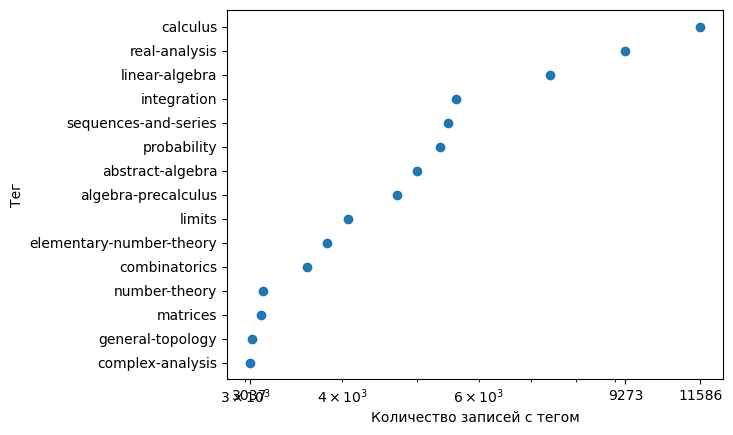

In [33]:
lists = sorted(major_tags.items(),key=lambda x:x[1]) 

y, x = zip(*lists)

fig, ax = plt.subplots()
ax.yaxis.set_tick_params(labelsize=10) 
plt.scatter(x, y)
plt.xlabel('Количество записей с тегом')
plt.ylabel('Тег')
plt.xscale('log')
# ticks = [min(major_tags.values()),round(median(major_tags.values())), lists[-2][1], max(major_tags.values())] 
ticks = [min(major_tags.values()),lists[-2][1], max(major_tags.values())] 
tick_labels = [f'{val}' for val in ticks]

#ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(ticks, tick_labels)
plt.show()

In [34]:
df.head()

,text_id,output_texts,input_texts,tags,augmentation,formulae_only
0,113506,$\cot(a-b)=\frac{1+\cot(a)\cot(b)}{\cot(a)-\co...,$\cot( а - би скобки закрываются равно 1 при...,[trigonometry],synonyms,True
1,812230,"Доказать, что $n= a×b + b×c + c×a$ нормален к ...","Доказать, что $ эн равняется a× би плюс b...",[linear-algebra],synonyms,False
2,388848,Продолжим ваше доказательство. Пусть $x_0$ как...,Продолжим ваше доказательство. Пусть хэ с ин...,"[real-analysis, general-topology, metric-space...",all_augments,False
3,166180,$P(1+np) = p$,$P(один+np) = p$,"[polynomials, prime-numbers]",num2word,True
4,144485,$$\mathcal{L}_{s}^{-1}\left[k\left(\frac{1}{s+...,\mathcall{L} {s}^{-1}\left[k\left(\frac{1}{s+\...,"[integration, laplace-transform, signal-proces...",rand_delet_and_typo,True


In [35]:
# и как тут проводить стратификацию......
# можно сделать по наиболее используемым тегам?
# создавать 1160 колонок как-то неоч...
# да даже одну с 1160 значениями...

In [36]:
# можно заметить что отсутствие тэгов - наиболее популярная опция
# дальше по встречаемости - вопросы по матану, вещественному анализу, линалу и вероятностям
# первых тэгов у нас значительно меньше
# т.ж. можно заметить, что много тегов у которых 1-2 использования
# из разряда 'book reommendations'
# в целом можно сделать так
# None --> оставить None
# если первый тэг в списке наиболее популярных (ну пусть >150 использований)
# то оставлять его 
#(в колонке будет 
#df['tags']=df['tags'].apply(prepare_tags_for_stratification, args=(popular_taglist))
# а если нет --> тэгать как 'Other'

# в итоге сделал не с первым тегом а в целом с любым из существующих

In [37]:
major_tags

{'linear-algebra': 7404,
 'real-analysis': 9273,
 'general-topology': 3055,
 'integration': 5601,
 'calculus': 11586,
 'elementary-number-theory': 3824,
 'probability': 5349,
 'algebra-precalculus': 4709,
 'abstract-algebra': 4993,
 'sequences-and-series': 5480,
 'number-theory': 3157,
 'limits': 4070,
 'matrices': 3144,
 'combinatorics': 3604,
 'complex-analysis': 3037}

In [38]:
def reassign_tags(line, major_tags):
#     line = literal_eval(line)
    #print(line)
    # если тегов нет
    if not len(line):
        return 'None'
    
    # смотрим есть ли у нас хотя бы один популярный тег
    populars = set(line).intersection(major_tags.keys())
    
    # если нет то тегаем как 'Другое'
    if not populars:
        return 'Other'
    # а если да - тегаем Самым популярным
    else:
        most_popular = max(populars, key=lambda tag: major_tags[tag])
        return most_popular


In [39]:
from tqdm import tqdm
tqdm.pandas()

In [40]:
df['tags'] = df['tags'].progress_apply(reassign_tags, args=[major_tags])

100%|██████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 445339.35it/s]


In [41]:
df.head()

,text_id,output_texts,input_texts,tags,augmentation,formulae_only
0,113506,$\cot(a-b)=\frac{1+\cot(a)\cot(b)}{\cot(a)-\co...,$\cot( а - би скобки закрываются равно 1 при...,Other,synonyms,True
1,812230,"Доказать, что $n= a×b + b×c + c×a$ нормален к ...","Доказать, что $ эн равняется a× би плюс b...",linear-algebra,synonyms,False
2,388848,Продолжим ваше доказательство. Пусть $x_0$ как...,Продолжим ваше доказательство. Пусть хэ с ин...,real-analysis,all_augments,False
3,166180,$P(1+np) = p$,$P(один+np) = p$,Other,num2word,True
4,144485,$$\mathcal{L}_{s}^{-1}\left[k\left(\frac{1}{s+...,\mathcall{L} {s}^{-1}\left[k\left(\frac{1}{s+\...,integration,rand_delet_and_typo,True


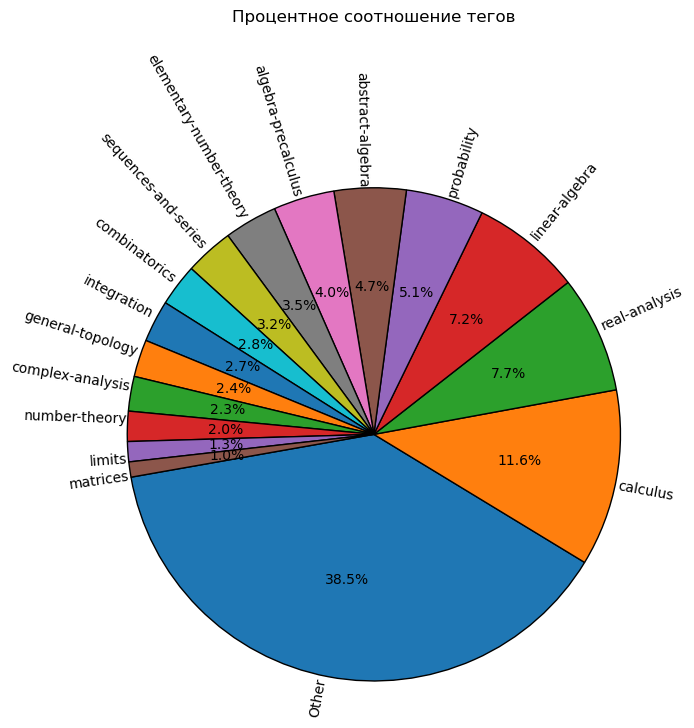

In [42]:
tag_counts = df['tags'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%', startangle=190,
        labeldistance=1,  textprops={'fontsize': 10}, rotatelabels=True,  wedgeprops={'edgecolor': 'black'})
plt.title('Процентное соотношение тегов', y=1.25)
plt.axis('equal')
plt.show()

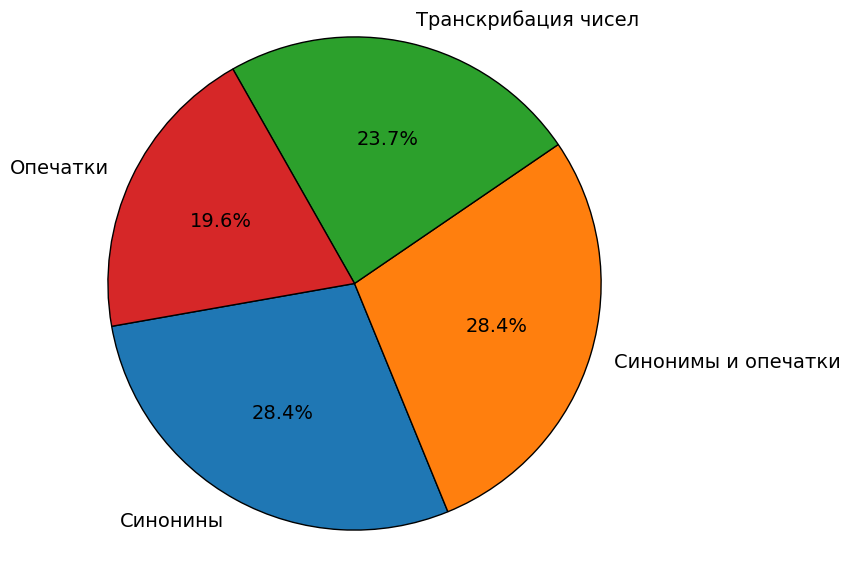

In [60]:
tag_counts = df['augmentation'].value_counts()

translations = {
    'all_augments': 'Синонимы и опечатки',
    'rand_delet_and_typo': 'Опечатки',
    'synonyms': 'Синонины',
    'num2word': 'Транскрибация чисел'
}
# Применение переводов к индексам
translated_labels = [translations[augmentation] for augmentation in tag_counts.index]

# Построение графика
plt.figure(figsize=(7, 7))
# Создание списка с процентами
percent = ['%1.1f%%' % (100 * count / sum(tag_counts)) if count / sum(tag_counts) >= 0.02 else ''
           for count in tag_counts]

# Построение круговой диаграммы с условием отображения процентов
plt.pie(tag_counts, labels=translated_labels, autopct=lambda p: '' if p < 2 else '%1.1f%%' % p,
        startangle=190, textprops={'fontsize': 14},  wedgeprops={'edgecolor': 'black'})
#plt.title('Процентное соотношение тегов', y=1.25)
plt.axis('equal')
plt.show()

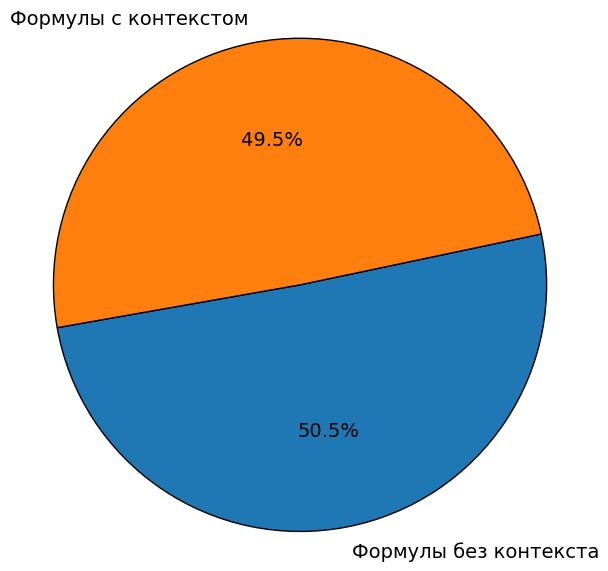

In [59]:
tag_counts = df['formulae_only'].value_counts()

translations = {
    True: 'Формулы с контекстом',
    False: 'Формулы без контекста'
}
# Применение переводов к индексам
translated_labels = [translations[formulae_only] for formulae_only in tag_counts.index]

# Построение графика
plt.figure(figsize=(7, 7))
# Создание списка с процентами
percent = ['%1.1f%%' % (100 * count / sum(tag_counts)) if count / sum(tag_counts) >= 0.02 else ''
           for count in tag_counts]

# Построение круговой диаграммы с условием отображения процентов
plt.pie(tag_counts, labels=translated_labels, autopct=lambda p: '' if p < 2 else '%1.1f%%' % p,
        startangle=190,  textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'black'})
#plt.title('Процентное соотношение тегов', y=1.25)
plt.axis('equal')
plt.show()

In [ ]:
tag_counts = df['tags'].value_counts()

# Словарь с переводами
translations = {
    'Other': 'Разное',
    'calculus': 'Математический анализ',
    'real-analysis': 'Вещественный анализ',
    'linear-algebra': 'Линейная алгебра',
    'probability': 'Теория вероятностей',
    'abstract-algebra': 'Общая алгебра',
    'algebra-precalculus': 'Алгебра до матанализа',
    'elementary-number-theory': 'Элементарная теория чисел',
    'sequences-and-series': 'Последовательности и ряды',
    'combinatorics': 'Комбинаторика',
    'integration': 'Интегрирование',
    'general-topology': 'Общая топология',
    'complex-analysis': 'Комплексный анализ',
    'number-theory': 'Теория чисел',
    'trigonometry': 'Тригонометрия',
    'limits': 'Пределы',
    'matrices': 'Матрицы'
}

# Применение переводов к индексам
translated_labels = [translations[tag] for tag in tag_counts.index]

# Построение графика
plt.figure(figsize=(7, 7))
# Создание списка с процентами
percent = ['%1.1f%%' % (100 * count / sum(tag_counts)) if count / sum(tag_counts) >= 0.02 else ''
           for count in tag_counts]

# Построение круговой диаграммы с условием отображения процентов
plt.pie(tag_counts, labels=translated_labels, autopct=lambda p: '' if p < 2 else '%1.1f%%' % p,
        startangle=190, labeldistance=1, textprops={'fontsize': 10}, rotatelabels=True, wedgeprops={'edgecolor': 'black'})
#plt.title('Процентное соотношение тегов', y=1.25)
plt.axis('equal')
plt.show()

In [84]:
df['tags'].value_counts()

tags
Other                       38836
calculus                    11590
real-analysis                7498
linear-algebra               7307
probability                  5161
abstract-algebra             4780
algebra-precalculus          4136
elementary-number-theory     3450
sequences-and-series         3188
combinatorics                2781
integration                  2770
complex-analysis             2295
number-theory                1975
trigonometry                 1972
limits                       1333
matrices                      928
Name: count, dtype: int64

In [86]:
model_parameters = model.parameters()
for param in model_parameters:
    print(param)

Parameter containing:
tensor([[-0.0259,  0.0857,  0.1655,  ...,  0.1941,  0.0503, -0.0718],
        [ 0.0138,  0.0115, -0.0540,  ...,  0.0128,  0.0281,  0.0180],
        [-0.0466,  0.4531, -0.0641,  ...,  0.1067,  0.0329,  0.0456],
        ...,
        [-0.0324, -0.0159, -0.0142,  ...,  0.0012, -0.0346, -0.0339],
        [-0.0252, -0.0240, -0.0197,  ...,  0.0365,  0.0023, -0.0009],
        [-0.0205, -0.0255, -0.0255,  ...,  0.0446,  0.0265, -0.0061]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.0043, -0.0041,  0.0029,  ...,  0.0146,  0.0096,  0.0101],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0473, -0.2084, -0.0909,  ..., -0.1556, -0.0117,  0.0453],
        ...,
        [-0.0041,  0.0058, -0.0033,  ..., -0.0071,  0.0096, -0.0140],
        [ 0.0043,  0.0003,  0.0040,  ..., -0.0029, -0.0071, -0.0027],
        [-0.0055, -0.0083,  0.0080,  ..., -0.0016, -0.0038,  0.0103]],
       device='cuda:0', requires_grad=True)


In [87]:
from transformers import AutoConfig

# Загрузка конфигурации модели из предварительно обученных параметров
config = AutoConfig.from_pretrained('/kaggle/working/finetuned_model/model_bart')

# Вывод конфигурации
print(config)

BartConfig {
  "_name_or_path": "/kaggle/working/finetuned_model/model_bart",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 12,
  "eos_token_id": 2,
  "extra_pos_embeddings": 2,
  "force_bos_token_to_be_generated": true,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder

In [42]:
df

,text_id,output_texts,input_texts,tags,augmentation,formulae_only
0,172853,$x_2 x_3 = 0$,x с индексом 2 х _3 равняется 0,Other,all_augments,True
1,187388,$$(fg)(0)=f(i)=w_i\sqsubseteq w_j=f(j)=(fg)(1)...,$$(fg скобки закрываются скобки открываются 0...,Other,synonyms,True
2,592605,Нашел ответ после долгих поисков. Это теорема ...,Нашел ответ после долгих поисков. Это теорема ...,Other,num2word,False
3,136427,$f(x)=\frac{3}{x}-\frac{x}{2}$,f(x)= frac{3}{x}- frac{x}{2},calculus,rand_delet_and_typo,True
4,3459,"$N(x,r) = \{y:\|x-y\|<r\}$","эн большая (x, ар скобки закрываются = \{y:...",sequences-and-series,all_augments,True
...,...,...,...,...,...,...
99995,71223,"$(\sqrt 2,1)\in U_1$","в круглых скобках корень из 2,1)\in у боль...",general-topology,all_augments,True
99996,31410,$a^b=k$,$ эй ^ би = ка $,number-theory,synonyms,True
99997,83499,$\boldsymbol\Sigma \in \mathrm{Spd}(p)$,boldsymbol Sigma входит в mathrz{Spd}( пэ ),Other,all_augments,True
99998,177786,$\operatorname{GL}_2(\mathbb{C})$,\operatorname{GL} синдексом2(\mathbb{C} сбобки...,abstract-algebra,all_augments,True


In [43]:
strats = ['tags', 'augmentation', 'formulae_only']
# df_rest, df_main =  train_test_split(df, test_size=0.15, random_state=42, stratify=df[strats])

In [44]:
# df_rest.to_parquet("UNTOUCHED_RS42_with_tags_already_stratified_3-8_for_train.parquet")

In [45]:
(df.tags.value_counts()/len(df))*100

tags
Other                       39.085
calculus                    11.426
real-analysis                7.532
linear-algebra               7.236
probability                  5.073
abstract-algebra             4.790
algebra-precalculus          4.055
elementary-number-theory     3.406
sequences-and-series         3.187
integration                  2.767
combinatorics                2.711
general-topology             2.409
number-theory                2.014
trigonometry                 1.994
limits                       1.340
matrices                     0.975
Name: count, dtype: float64

In [46]:
(df.tags.value_counts()/len(df))*100

tags
Other                       39.085
calculus                    11.426
real-analysis                7.532
linear-algebra               7.236
probability                  5.073
abstract-algebra             4.790
algebra-precalculus          4.055
elementary-number-theory     3.406
sequences-and-series         3.187
integration                  2.767
combinatorics                2.711
general-topology             2.409
number-theory                2.014
trigonometry                 1.994
limits                       1.340
matrices                     0.975
Name: count, dtype: float64

In [47]:
# делим 80/15/5
train_dataset, test_dataset = train_test_split(df, 
                                               test_size=0.01,
                                               stratify=df[strats] ,
                                               random_state=1)
train_dataset, val_dataset = train_test_split(train_dataset,
                                              test_size=0.1425, 
                                              stratify=train_dataset[strats],
                                              random_state=1)
print("Training data size: {}".format(len(train_dataset)))
print("Validation data size: {}".format(len(val_dataset)))
print("Testing data size: {}".format(len(test_dataset)))


Training data size: 84892
Validation data size: 14108
Testing data size: 1000


In [48]:
train_dataset.head()

,text_id,output_texts,input_texts,tags,augmentation,formulae_only
83984,907522,"вы можете подумать, что$x>0$,\r\n\r\nзатем $0<...","вы можете подумать, что$x>ноль$,\r\n\r\nзатем ...",calculus,num2word,False
23940,54619,$a_{i}(b\times c)_{i}$,$a с индексом {i}( би \times c скобка закрывае...,Other,synonyms,True
88865,928363,"Это то, что мы называем трансцендентными уравн...","Это то, что мы называем трансцендентными уравн...",trigonometry,synonyms,False
82158,496709,"- Я нашел ссылку на это. По сути, нам нужно, ч...","- Я нашел ссылку на это. По сути, нам нужно, ч...",Other,all_augments,False
47097,60173,$$a=2(p+s+r-t-q)k$$,$$a равно 2(p+s+ ар -t- ку )k$$,Other,synonyms,True


In [49]:
train_dataset = CustomDataset(train_dataset, tokenizer)
#test_dataset = CustomDataset(test_dataset, tokenizer)
val_dataset = CustomDataset(val_dataset, tokenizer)

In [50]:
for item in train_dataset[3]:
    print(item)
    print(len(train_dataset[3][item]))
   

input_ids
174
attention_mask
174
labels
174


In [51]:
BATCH_SIZE=40

train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          pin_memory=False)
val_loader = DataLoader(val_dataset,
                        batch_size=BATCH_SIZE,
                        shuffle=False,
                        pin_memory=False)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

In [52]:
from tqdm.auto import tqdm
from transformers import get_scheduler

In [53]:
%%time
# основная часть -- training/eval loops
epochs = 3
train_losses = []
val_losses = []
edit_scores = []

for epoch in range(epochs):
    # обучение
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'train epoch {epoch + 1}/{epochs}'):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'train loss: {avg_train_loss}')

    # валидация
    model.eval()
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f'val epoch {epoch + 1}/{epochs}'):
            #print(batch)
            for item in batch:
                batch[item]=batch[item].to(device)
            #print(batch)
            outputs = model(**batch)
            
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
         
        val_loss = outputs.loss
        val_losses.append(val_loss.item())
    
    print(f'val loss: {val_loss.item()}')

train epoch 1/3:   0%|                                                                        | 0/3538 [00:00<?, ?it/s]C:\Users\kosty\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\bart\modeling_bart.py:590: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
train epoch 1/3: 100%|███████████████████████████████████████████████████████████| 3538/3538 [1:31:34<00:00,  1.55s/it]


train loss: 0.10207815806593572


val epoch 1/3: 100%|█████████████████████████████████████████████████████████████████| 588/588 [05:03<00:00,  1.94it/s]


val loss: 0.07281526178121567


train epoch 2/3: 100%|███████████████████████████████████████████████████████████| 3538/3538 [1:38:01<00:00,  1.66s/it]


train loss: 0.09020033773322263


val epoch 2/3: 100%|█████████████████████████████████████████████████████████████████| 588/588 [05:02<00:00,  1.95it/s]


val loss: 0.08832909911870956


train epoch 3/3: 100%|███████████████████████████████████████████████████████████| 3538/3538 [1:38:08<00:00,  1.66s/it]


train loss: 0.08275271221256192


val epoch 3/3: 100%|█████████████████████████████████████████████████████████████████| 588/588 [05:01<00:00,  1.95it/s]

val loss: 0.08058952540159225
CPU times: total: 2h 1min 39s
Wall time: 5h 2min 51s


In [54]:
import gc
torch.cuda.empty_cache()
gc.collect() 

0

In [55]:
# %%time

# model.eval()
# model.to('cuda')

# test_metrics = []
# hyps = []
# all_preds=[]
# with torch.no_grad():
#     for batch in tqdm(test_loader, desc='testing'):
#         batch['input_ids']=batch['input_ids'].to('cuda')
#         phrases = tokenizer.batch_decode(batch['labels'], skip_special_tokens=True)
#         hypotheses = []
        
#         for tens_to_be, phrase in zip(batch['input_ids'],phrases):
#             max_len = len(phrase)

#             one_pred = model.generate(
#                 tens_to_be.unsqueeze(0),
#                 do_sample=True, 
#                 top_p=0.95, 
#                 num_return_sequences=1, 
#                 repetition_penalty=2.2,
#                 max_length=max_len 
#             )
#             hyps.append(one_pred.tolist()[0])
#         hyps = tokenizer.batch_decode(hyps, skip_special_tokens=True)

#         all_preds.append(hyps)
#         for generated, label in zip(hyps, phrases):
#             metric = Levenshtein.normalized_similarity(generated, label)
#             test_metrics.append(metric)
#         hyps=[]

# print(test_metrics)


In [56]:
# test_average = sum(test_metrics)/len(test_metrics)
# print(f"the average normalized levenshtein similarity is: {test_average}")

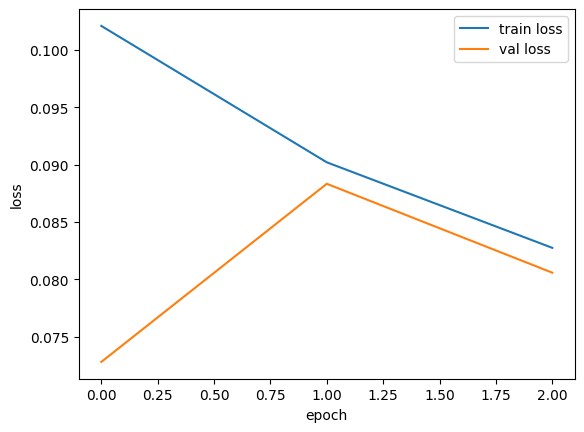

In [57]:
from matplotlib import pyplot as plt
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [58]:
import os 
output_dir = "/kaggle/working/finetuned_model/model_bart/test/small_test_ds.parquet"

model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

test_dir = os.path.join(output_dir, "test")
os.makedirs(test_dir, exist_ok=True)
test_dataset.to_parquet(os.path.join(test_dir, "small_test_ds.parquet"))

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


In [59]:
import shutil
from datetime import datetime

shutil.make_archive(f"ft_mod_{datetime.now().strftime('%d_%m_%Y')}", 'zip', output_dir)

'C:\\Users\\kosty\\ft_mod_17_05_2024.zip'

In [60]:
ex_metr = (
    ("aaa","aaa"),
    ("aab","aba"),
    ("I went to school", "I went  to school"),
    ("Я не люблю кушать дома", "я не лблю кушать дмаю"),
    ("$\int_{3}^5 / k} &varphi$", "$\int_{3}^{5} \\varphi$")
)

for ex in ex_metr:
    al_lev = Levenshtein.normalized_similarity(ex[0], ex[1])
    print(f"Схожесть между \"{ex[0]}\" и \"{ex[1]}\": {al_lev}")

Схожесть между "aaa" и "aaa": 1.0
Схожесть между "aab" и "aba": 0.33333333333333337
Схожесть между "I went to school" и "I went  to school": 0.9411764705882353
Схожесть между "Я не люблю кушать дома" и "я не лблю кушать дмаю": 0.8181818181818181
Схожесть между "$\int_{3}^5 / k} &varphi$" и "$\int_{3}^{5} \varphi$": 0.76


<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
C:\Users\kosty\AppData\Local\Temp\ipykernel_12468\3287579123.py:6: SyntaxWarning: invalid escape sequence '\i'
  ("$\int_{3}^5 / k} &varphi$", "$\int_{3}^{5} \\varphi$")
C:\Users\kosty\AppData\Local\Temp\ipykernel_12468\3287579123.py:6: SyntaxWarning: invalid escape sequence '\i'
  ("$\int_{3}^5 / k} &varphi$", "$\int_{3}^{5} \\varphi$")


In [196]:
text = 'интеграл от 3 до 5 по /phi '
inputs = tokenizer(text, return_tensors='pt').to('cuda')

with torch.no_grad():
    hypotheses = model.generate(
        **inputs, 
        do_sample=True, 
        top_p=0.95, 
        num_return_sequences=4, 
        repetition_penalty=1.2,
        max_length=len(text),
        temperature=0.6,
        #top_k=50,
        min_length=10,
        length_penalty=1.0,
        #num_beams=5,
        no_repeat_ngram_size=2,
        #early_stopping=True,
    )
for h in hypotheses:
    print(tokenizer.decode(h, skip_special_tokens=True))

$\int_{3}^{5}/phi $
$\int_{3}^{5}/phi $
$\int_{3}^{5}/phi $
$\int_{3}^{5}/phi $


In [190]:
print(f"Количество семплов: {len(df)}")
print(f"Размер контекстного окна: {med_len}")
print(f"Количество эпох: {epochs}")
print(f"Размер батчей: {BATCH_SIZE}")

Количество семплов: 100000
Размер контекстного окна: 174.0
Количество эпох: 3
Размер батчей: 24
